In [23]:
import tensorflow as tf

from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [24]:
(x_train, y_train), (x_test, y_test) = load_data(path="mnist.npz")

In [25]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [26]:
x_train_scale = x_train / 255.0
x_test_scale = x_test / 255.0

In [27]:
model01 = Sequential([
    Flatten(),
    Dense(8, activation=tf.nn.relu),
    Dense(64, activation=tf.nn.relu),
    Dense(32, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

In [28]:
model01.compile(loss="sparse_categorical_crossentropy",
                optimizer=SGD(),
                metrics=["acc"])

In [29]:
result01 = model01.fit(x_train_scale, y_train, epochs=100, validation_split=0.3, batch_size=100)

Epoch 1/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.1472 - loss: 2.2484 - val_acc: 0.4103 - val_loss: 1.9139
Epoch 2/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5057 - loss: 1.6347 - val_acc: 0.7086 - val_loss: 0.9312
Epoch 3/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7369 - loss: 0.8533 - val_acc: 0.7917 - val_loss: 0.6602
Epoch 4/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8046 - loss: 0.6320 - val_acc: 0.8322 - val_loss: 0.5555
Epoch 5/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8358 - loss: 0.5496 - val_acc: 0.8546 - val_loss: 0.4754
Epoch 6/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8590 - loss: 0.4852 - val_acc: 0.8655 - val_loss: 0.4372
Epoch 7/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8734 - loss: 0.4362 - val_acc: 0.8774 - val_loss: 0.4084
Epoch 8/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8790 - loss: 0.4122 - val_acc: 0.8809 - val_loss: 0.3897
Epoch 9/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

In [30]:
model01.evaluate(x_test_scale, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9333 - loss: 0.2177


[0.1966184675693512, 0.9423999786376953]

In [31]:
model02 = Sequential([
    Flatten(),
    Dense(8, activation=tf.nn.relu),
    Dense(64, activation=tf.nn.relu),
    Dropout(0.2), # 랜덤으로 뉴런 자르기
    Dense(32, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

In [32]:
model02.compile(loss="sparse_categorical_crossentropy",
                optimizer=SGD(),
                metrics=["acc"])

In [33]:
# loss가 더 이상 감소하지 않는 값(최소값) 이 3번 나오면 학습을 중단하자
early_stopping = EarlyStopping(monitor="loss", patience=3)
# 더 이상의 성능 향상이 없으면 자동으로 학습을 조기 종료함
# 과적합 방지

In [34]:
result02 = model02.fit(x_train_scale, y_train,
                       epochs=100, callbacks=[early_stopping],
                       validation_split=0.3, batch_size=100)

Epoch 1/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.1489 - loss: 2.2645 - val_acc: 0.3814 - val_loss: 1.8464
Epoch 2/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.4294 - loss: 1.6897 - val_acc: 0.6148 - val_loss: 1.1939
Epoch 3/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.6036 - loss: 1.1895 - val_acc: 0.7232 - val_loss: 0.8866
Epoch 4/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7004 - loss: 0.9254 - val_acc: 0.7987 - val_loss: 0.6753
Epoch 5/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7653 - loss: 0.7410 - val_acc: 0.8343 - val_loss: 0.5523
Epoch 6/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8096 - loss: 0.6207 - val_acc: 0.8474 - val_loss: 0.5021
Epoch 7/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8226 - loss: 0.5851 - val_acc: 0.8579 - val_loss: 0.4731
Epoch 8/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8360 - loss: 0.5367 - val_acc: 0.8639 - val_loss: 0.4511
Epoch 9/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

In [35]:
model02.evaluate(x_test_scale, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9158 - loss: 0.2697


[0.2411910891532898, 0.9254000186920166]

In [36]:
model03 = Sequential([
    Flatten(),
    Dense(8, activation=tf.nn.relu),
    Dense(64, activation=tf.nn.relu),
    Dropout(0.5), # 랜덤으로 뉴런 자르기
    Dense(32, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

In [37]:
model03.compile(loss="sparse_categorical_crossentropy",
                optimizer=SGD(),
                metrics=["acc"])

In [38]:
result03 = model03.fit(x_train_scale, y_train,
                       epochs=100, callbacks=[early_stopping],
                       validation_split=0.3, batch_size=100)

Epoch 1/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.1167 - loss: 2.2917 - val_acc: 0.2809 - val_loss: 2.1711
Epoch 2/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.2624 - loss: 2.1080 - val_acc: 0.5320 - val_loss: 1.6087
Epoch 3/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4808 - loss: 1.6053 - val_acc: 0.6863 - val_loss: 1.0066
Epoch 4/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6356 - loss: 1.1391 - val_acc: 0.7884 - val_loss: 0.7181
Epoch 5/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7106 - loss: 0.9078 - val_acc: 0.8124 - val_loss: 0.6225
Epoch 6/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7499 - loss: 0.7905 - val_acc: 0.8326 - val_loss: 0.5632
Epoch 7/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7739 - loss: 0.7278 - val_acc: 0.8432 - val_loss: 0.5295
Epoch 8/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7933 - loss: 0.6847 - val_acc: 0.8491 - val_loss: 0.4986
Epoch 9/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

In [39]:
model03.evaluate(x_test_scale, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9176 - loss: 0.2781


[0.25012466311454773, 0.9265999794006348]

In [40]:
model04 = Sequential([
    Flatten(),
    Dense(8, activation=tf.nn.relu),
    Dense(64, activation=tf.nn.relu),
    Dropout(0.75), # 랜덤으로 뉴런 자르기
    Dense(32, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

In [41]:
model04.compile(loss="sparse_categorical_crossentropy",
                optimizer=SGD(),
                metrics=["acc"])

In [42]:
result04 = model04.fit(x_train_scale, y_train,
                       epochs=100, callbacks=[early_stopping],
                       validation_split=0.3, batch_size=100)

Epoch 1/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.1201 - loss: 2.2899 - val_acc: 0.2878 - val_loss: 2.1526
Epoch 2/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.2417 - loss: 2.1055 - val_acc: 0.4378 - val_loss: 1.7654
Epoch 3/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.3752 - loss: 1.8049 - val_acc: 0.5598 - val_loss: 1.4131
Epoch 4/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.4674 - loss: 1.5495 - val_acc: 0.6357 - val_loss: 1.1523
Epoch 5/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5114 - loss: 1.3595 - val_acc: 0.7022 - val_loss: 0.9558
Epoch 6/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5755 - loss: 1.1941 - val_acc: 0.8014 - val_loss: 0.8056
Epoch 7/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.6301 - loss: 1.0782 - val_acc: 0.8327 - val_loss: 0.6802
Epoch 8/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6701 - loss: 0.9767 - val_acc: 0.8515 - val_loss: 0.5836
Epoch 9/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

In [43]:
model04.evaluate(x_test_scale, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8977 - loss: 0.3513


[0.30831098556518555, 0.9124000072479248]

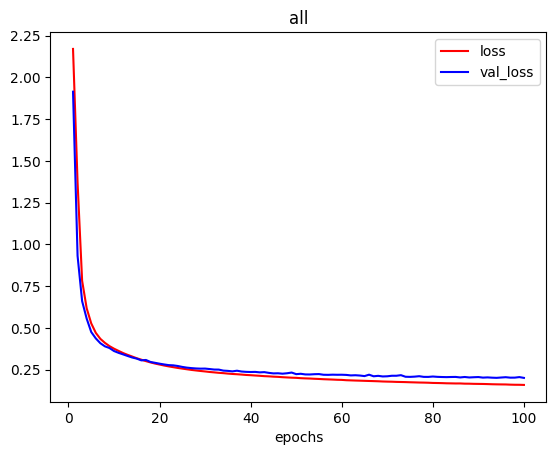

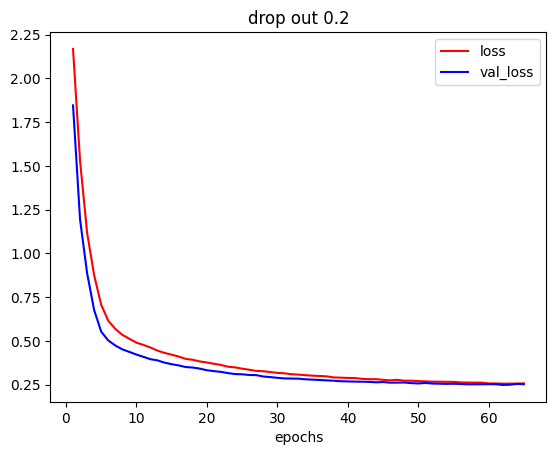

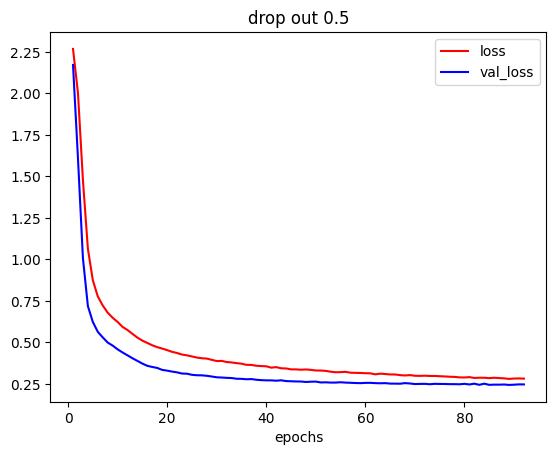

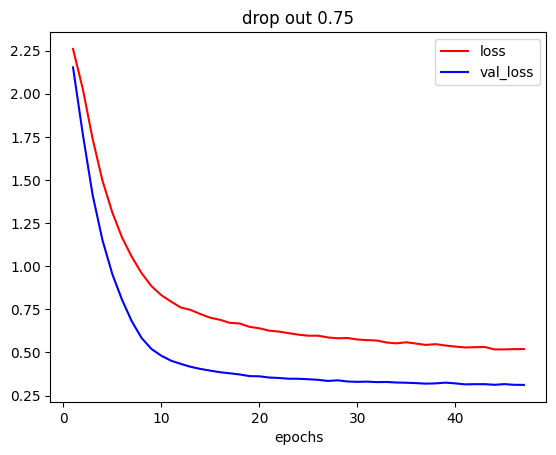

In [44]:
result_list = [result01, result02, result03, result04]
title_list = ["all", "drop out 0.2", "drop out 0.5", "drop out 0.75"]

for idx, result in enumerate(result_list):
    epochs = range(1, len(result.history["loss"]) + 1)

    plt.plot(epochs, result.history["loss"], color="red", label="loss")
    plt.plot(epochs, result.history["val_loss"], color="blue", label="val_loss")

    plt.xlabel("epochs")
    plt.title(title_list[idx])
    plt.legend()
    plt.show()